#### 0. 학습 데이터 전처리

In [3]:
# 압축풀기
%cd drive/MyDrive/Colab\ Notebooks/22.04.11\ 머신러닝(교육실D)

/content/drive/MyDrive/Colab Notebooks/22.04.11 머신러닝(교육실D)


In [4]:
!ls

 data
'ex00_colab 사용하기.ipynb'
'ex01_비만도 데이터 학습하기.ipynb'
'ex02_주택가격 데이터 예측하기.ipynb'
'ex10_다중분류모델 만들기(3가지 동물 분류).ipynb'
'jupyter notebook'


In [ ]:
!unzip ./data/animal_data.zip -d ./data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os # 파이썬을 이용해 시스템 정보를 확인하고 제어하는 라이브러리

In [9]:
# 특정 폴더 밑에 사진이름이 규칙적이지 않을 경우에는 os모듈을 이용하자
img = cv2.imread('./data/dog/2.png')
img.shape

(224, 224, 3)

In [11]:
# 폴더 밑에 있는 파일이나 디렉토리 이름을 얻어내는 함수
dog_file_names = os.listdir('./data/dog')
dog_file_names

['1.png',
 '10.png',
 '100.png',
 '101.png',
 '102.png',
 '103.png',
 '104.png',
 '105.png',
 '106.png',
 '107.png',
 '108.png',
 '109.png',
 '11.png',
 '110.png',
 '111.png',
 '112.png',
 '113.png',
 '114.png',
 '115.png',
 '116.png',
 '117.png',
 '118.png',
 '119.png',
 '12.png',
 '120.png',
 '121.png',
 '122.png',
 '123.png',
 '124.png',
 '125.png',
 '126.png',
 '127.png',
 '128.png',
 '129.png',
 '13.png',
 '130.png',
 '131.png',
 '132.png',
 '133.png',
 '134.png',
 '135.png',
 '136.png',
 '137.png',
 '138.png',
 '139.png',
 '14.png',
 '140.png',
 '141.png',
 '142.png',
 '144.png',
 '145.png',
 '147.png',
 '148.png',
 '149.png',
 '15.png',
 '151.png',
 '152.png',
 '153.png',
 '154.png',
 '155.png',
 '156.png',
 '157.png',
 '158.png',
 '159.png',
 '16.png',
 '160.png',
 '162.png',
 '163.png',
 '164.png',
 '165.png',
 '166.png',
 '167.png',
 '168.png',
 '17.png',
 '171.png',
 '172.png',
 '173.png',
 '174.png',
 '175.png',
 '176.png',
 '177.png',
 '178.png',
 '179.png',
 '18.png',
 '1

In [10]:
cat_file_names = os.listdir('./data/cat')
fox_file_names = os.listdir('./data/desert_fox')

In [12]:
dog_images = []
for fname in dog_file_names:
    raw_img = cv2.imread('./data/dog/'+fname)
    raw_img_rgb = cv2.cvtColor(raw_img,cv2.COLOR_BGR2RGB) #BGR -> RGB
    # 이미지 크기 조절하기
    resize_img = cv2.resize(raw_img_rgb, dsize=(224,224), interpolation=cv2.INTER_AREA)
    # 이미지 정규화(-1 ~ 1)
    normalized_img = (np.array(resize_img,dtype=np.float32) / 127.0) - 1
    dog_images.append(np.array(normalized_img)) # numpy타입으로 변환
    
dog_images = np.array(dog_images)
dog_images.shape

(371, 224, 224, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


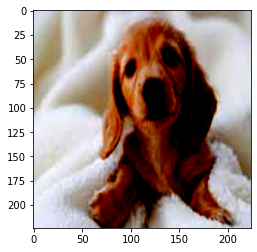

In [ ]:
plt.imshow(dog_images[0])
plt.show()

In [13]:
cat_images = []
for fname in cat_file_names:
    raw_img = cv2.imread('./data/cat/'+fname)
    raw_img_rgb = cv2.cvtColor(raw_img,cv2.COLOR_BGR2RGB) #BGR -> RGB
    # 이미지 크기 조절하기
    resize_img = cv2.resize(raw_img_rgb, dsize=(224,224), interpolation=cv2.INTER_AREA)
    # 이미지 정규화(-1 ~ 1)
    normalized_img = (np.array(resize_img,dtype=np.float32) / 127.0) - 1
    cat_images.append(np.array(normalized_img)) # numpy타입으로 변환
    
cat_images = np.array(cat_images)
cat_images.shape

(402, 224, 224, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


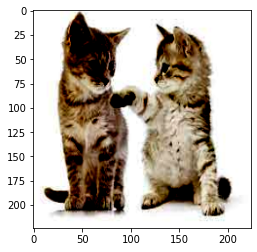

In [ ]:
plt.imshow(cat_images[0])
plt.show()

In [14]:
fox_images = []
for fname in fox_file_names:
    raw_img = cv2.imread('./data/desert_fox/'+fname)
    raw_img_rgb = cv2.cvtColor(raw_img,cv2.COLOR_BGR2RGB) #BGR -> RGB
    # 이미지 크기 조절하기
    resize_img = cv2.resize(raw_img_rgb, dsize=(224,224), interpolation=cv2.INTER_AREA)
    # 이미지 정규화(-1 ~ 1)
    normalized_img = (np.array(resize_img,dtype=np.float32) / 127.0) - 1
    fox_images.append(np.array(normalized_img)) # numpy타입으로 변환
    
fox_images = np.array(fox_images)
fox_images.shape

(372, 224, 224, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


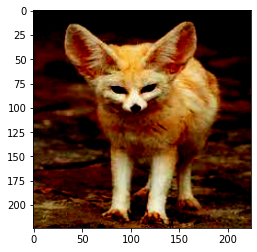

In [15]:
plt.imshow(fox_images[0])
plt.show()

In [16]:
X = np.concatenate([dog_images,cat_images,fox_images])
X.shape

(1145, 224, 224, 3)

In [17]:
# 개 0, 고양이 1, 사막여우 2
y = np.array([0] * 371 + [1] * 402 + [2] * 372)
y.shape

(1145,)

In [18]:
from tensorflow.keras.models import Sequential # 신경망을 붙이는 뼈대
from tensorflow.keras.layers import InputLayer, Dense # 입력층 / 중간및출력층

#### 1. 모델 생성

In [ ]:
animal_model = Sequential() # 뼈대 생성
animal_model.add(InputLayer(input_shape=(224*224*3,))) #입력층
animal_model.add(Dense(units=128, activation='sigmoid')) #중간층
animal_model.add(Dense(units=128, activation='sigmoid')) #중간층
animal_model.add(Dense(units=64, activation='sigmoid')) #중간층
animal_model.add(Dense(units=32, activation='sigmoid')) #중간층
animal_model.add(Dense(units=3, activation='softmax')) #출력층

#### 2. 모델 학습

In [ ]:
animal_model.compile(loss='sparse_categorical_crossentropy',
                    optimizer='Adam',
                    metrics=['accuracy'])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,
                                                random_state=425)

In [ ]:
X_train.shape

(916, 224, 224, 3)

In [ ]:
animal_model.fit(X_train.reshape(916,224*224*3),
                y_train, epochs=100)

Epoch 1/100
29/29 [==============================] - 3s 101ms/step - loss: 1.1071 - accuracy: 0.3734
Epoch 2/100
29/29 [==============================] - 3s 99ms/step - loss: 1.0926 - accuracy: 0.3679
Epoch 3/100
29/29 [==============================] - 3s 94ms/step - loss: 1.0841 - accuracy: 0.3974
Epoch 4/100
29/29 [==============================] - 3s 92ms/step - loss: 1.0838 - accuracy: 0.3908
Epoch 5/100
29/29 [==============================] - 3s 89ms/step - loss: 1.0775 - accuracy: 0.4050
Epoch 6/100
29/29 [==============================] - 3s 88ms/step - loss: 1.0716 - accuracy: 0.4050
Epoch 7/100
29/29 [==============================] - 3s 90ms/step - loss: 1.0643 - accuracy: 0.4181
Epoch 8/100
29/29 [==============================] - 3s 97ms/step - loss: 1.0630 - accuracy: 0.4247
Epoch 9/100
29/29 [==============================] - 3s 95ms/step - loss: 1.0510 - accuracy: 0.4290
Epoch 10/100
29/29 [==============================] - 3s 95ms/step - loss: 1.0440 - accuracy: 0.441

#### 3. 모델 예측

In [ ]:
X_test.shape

In [ ]:
pre = animal_model.predict(X_test.reshape(229,224*224*3))

In [ ]:
pre

#### 4. 모델 평가

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,pre.argmax(1)))

## CNN 모델 만들기

In [21]:
from tensorflow.keras.layers import Conv2D,MaxPool2D, Flatten

#### 1. 모델생성

In [40]:
cnn_model = Sequential() # 모델의 뼈대
# 특성 추출부
cnn_model.add(InputLayer(input_shape=(224,224,3)))
cnn_model.add(Conv2D(filters=128,
                    kernel_size=(3,3),
                    activation="relu"))
cnn_model.add(MaxPool2D()) # 불필요한 정보를 삭제
cnn_model.add(Conv2D(filters=256,
                    kernel_size=(3,3),
                    activation="relu"))
cnn_model.add(MaxPool2D())
cnn_model.add(Conv2D(filters=128,
                    kernel_size=(3,3),
                    activation="relu"))
cnn_model.add(MaxPool2D())
cnn_model.add(Conv2D(filters=64,
                    kernel_size=(3,3),
                    activation="relu"))
cnn_model.add(MaxPool2D())
# 분류기(MLP)
cnn_model.add(Flatten())
cnn_model.add(Dense(units=64,activation='sigmoid'))
cnn_model.add(Dense(units=32,activation='sigmoid'))
cnn_model.add(Dense(units=3,activation='softmax'))

In [41]:
cnn_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 128)     3584      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 111, 111, 128)    0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 256)     295168    
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 54, 54, 256)      0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 128)       295040    
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 26, 26, 128)     

#### 2. 모델 학습

In [42]:
cnn_model.compile(loss="sparse_categorical_crossentropy",
                 optimizer="Adam",
                 metrics=['accuracy'])

In [43]:
from sklearn.model_selection import train_test_split

In [45]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,
                                                random_state=425)

In [46]:
cnn_model.fit(X_train,y_train,epochs=50)

Epoch 1/50
29/29 [==============================] - 17s 455ms/step - loss: 1.1117 - accuracy: 0.3417
Epoch 2/50
29/29 [==============================] - 11s 388ms/step - loss: 1.0915 - accuracy: 0.3701
Epoch 3/50
29/29 [==============================] - 11s 386ms/step - loss: 1.0664 - accuracy: 0.4541
Epoch 4/50
29/29 [==============================] - 11s 387ms/step - loss: 1.0677 - accuracy: 0.4301
Epoch 5/50
29/29 [==============================] - 11s 385ms/step - loss: 1.0267 - accuracy: 0.4924
Epoch 6/50
29/29 [==============================] - 11s 387ms/step - loss: 0.9979 - accuracy: 0.5066
Epoch 7/50
29/29 [==============================] - 11s 386ms/step - loss: 0.9412 - accuracy: 0.5535
Epoch 8/50
29/29 [==============================] - 11s 387ms/step - loss: 0.8441 - accuracy: 0.6266
Epoch 9/50
29/29 [==============================] - 11s 387ms/step - loss: 0.7218 - accuracy: 0.7194
Epoch 10/50
29/29 [==============================] - 11s 387ms/step - loss: 0.5855 - accura

#### 3. 모델 예측

In [47]:
pre = cnn_model.predict(X_test)

#### 4. 모델 평가

In [48]:
from sklearn.metrics import classification_report

In [49]:
pre[:5]

array([[8.3474256e-04, 9.9750948e-01, 1.6556962e-03],
       [9.9039513e-01, 1.9319650e-03, 7.6728710e-03],
       [3.8866031e-01, 2.4336243e-01, 3.6797729e-01],
       [4.7980887e-03, 9.9401134e-01, 1.1905787e-03],
       [2.1821461e-03, 1.3646644e-01, 8.6135149e-01]], dtype=float32)

In [30]:
print(classification_report(y_test,np.argmax(pre,axis=1)))

              precision    recall  f1-score   support

           0       0.37      0.16      0.22        70
           1       0.38      0.65      0.48        82
           2       0.47      0.35      0.40        77

    accuracy                           0.40       229
   macro avg       0.40      0.38      0.37       229
weighted avg       0.40      0.40      0.37       229



In [39]:
print(classification_report(y_test,np.argmax(pre,axis=1)))

              precision    recall  f1-score   support

           0       0.33      0.29      0.31        70
           1       0.40      0.44      0.42        82
           2       0.42      0.44      0.43        77

    accuracy                           0.39       229
   macro avg       0.39      0.39      0.39       229
weighted avg       0.39      0.39      0.39       229



In [50]:
print(classification_report(y_test,np.argmax(pre,axis=1)))

              precision    recall  f1-score   support

           0       0.33      0.31      0.32        70
           1       0.45      0.51      0.48        82
           2       0.47      0.43      0.45        77

    accuracy                           0.42       229
   macro avg       0.42      0.42      0.42       229
weighted avg       0.42      0.42      0.42       229

